### Topic Modeling using LDA for Business and Risk Factors of SEC Filings
Reference: https://github.com/kapadias/mediumposts/blob/master/natural_language_processing/topic_modeling/notebooks/Introduction%20to%20Topic%20Modeling.ipynb

In [49]:
import pandas as pd
import os

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
# Read every file in the directory
report = []
for dir in os.listdir():
    if dir.startswith("0"):
        f = open(dir + "/" + "full-readable.txt", "r")
        report.append(f.read())
#print(report[0])
strategy = pd.DataFrame(report, columns =['raw_text']) 
strategy

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,raw_text
0,united states securities and exchange commiss...
1,part ii item 5.\nmarket for registrant’s commo...
2,united states securities and exchange commiss...
3,united states securities and exchange commiss...
4,part ii item 5 market for registrant’s commo...
...,...
776,united states securities and exchange commiss...
777,part ii item 5.\nmarket for registrant's commo...
778,united states securities and exchange commiss...
779,part ii ​ item 5.\nmarket for registrant’s com...


In [51]:
# Remove punctuation/lower casing
# Load the regualr expression library
import re
# Remove all special characters
strategy['text_processed'] = \
strategy['raw_text'].map(lambda x: " ".join([re.sub(r"[^a-zA-Z0-9]+", ' ', k) for k in x.split("\n")]))

# Convert the titles to lowercase
strategy['text_processed'] = \
strategy['text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
strategy['text_processed'][0]


/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


' united states securities and exchange commission washington d c  20549 form 10 k annual report pursuant to section 13 or 15 d of the securities exchange act of 1934 for the fiscal year ended december 29 2019 or transition report pursuant to section 13 or 15 d of the securities exchange act of 1934 commission file number 001 14543 trueblue inc   exact name of registrant as specified in its charter washington 91 1287341 state of incorporation i r s  employer identification no 1015 a street tacoma washington 98402 address of principal executive offices zip code registrant s telephone number including area code 253 383 9101 securities registered pursuant to section 12 b of the act title of each class trading symbol s name of each exchange on which registered common stock no par value tbi new york stock exchange securities registered under section 12 g of the act none indicate by check mark if the registrant is a well known seasoned issuer as defined in rule 405 of the securities act  yes

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


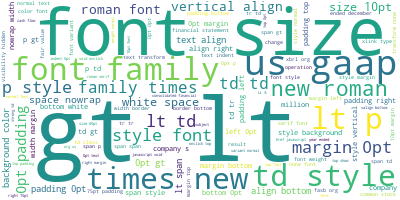

In [53]:
# Exploratory analysis
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together
long_string = ','.join(list(strategy['text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

# Adobe seemed to have ruined wordcloud

In [54]:
# Prepare text for LDA analysis
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'part', 'ii'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = strategy.text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /Users/rich/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['united', 'states', 'securities', 'exchange', 'commission', 'washington', 'form', 'annual', 'report', 'pursuant', 'section', 'securities', 'exchange', 'act', 'fiscal', 'year', 'ended', 'december', 'transition', 'report', 'pursuant', 'section', 'securities', 'exchange', 'act', 'commission', 'file', 'number', 'trueblue', 'inc']


In [44]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 2), (1, 5), (2, 28), (3, 6), (4, 1), (5, 3), (6, 1), (7, 2), (8, 4), (9, 7), (10, 2), (11, 1), (12, 1), (13, 4), (14, 4), (15, 8), (16, 19), (17, 1), (18, 9), (19, 15), (20, 3), (21, 6), (22, 7), (23, 1), (24, 2), (25, 2), (26, 9), (27, 69), (28, 28), (29, 1)]


In [45]:
from pprint import pprint

# number of topics
num_topics = 3

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.017*"company" + 0.011*"plan" + 0.009*"may" + 0.009*"shares" + '
  '0.009*"stock" + 0.009*"agreement" + 0.008*"shall" + 0.006*"common" + '
  '0.006*"section" + 0.006*"tax"'),
 (1,
  '0.014*"company" + 0.009*"stock" + 0.007*"agreement" + 0.007*"shares" + '
  '0.006*"may" + 0.006*"common" + 0.006*"rsus" + 0.006*"plan" + 0.006*"tax" + '
  '0.005*"shall"'),
 (2,
  '0.012*"company" + 0.007*"may" + 0.007*"agreement" + 0.006*"stock" + '
  '0.006*"december" + 0.005*"tax" + 0.005*"million" + 0.005*"plan" + '
  '0.005*"common" + 0.004*"financial"')]


In [48]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

/usr/local/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
2     -0.012240  0.0       1        1  49.985764
0      0.011509  0.0       2        1  47.996462
1      0.000730  0.0       3        1   2.017774, topic_info=            Term          Freq         Total Category  logprob  loglift
570      company  14487.000000  14487.000000  Default  30.0000  30.0000
3043       stock   7307.000000   7307.000000  Default  29.0000  29.0000
120    agreement   7744.000000   7744.000000  Default  28.0000  28.0000
2936      shares   6632.000000   6632.000000  Default  27.0000  27.0000
1953         may   8013.000000   8013.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
798     december     77.255237   4412.358903   Topic3  -5.5580  -0.1419
1553         inc     70.885165   3845.341951   Topic3  -5.6440  -0.0904
1563      income     62.316707   3010.702926   Topic3  -5.7728   0.0255
443         cash     67.594992   3685.219797   Topic3  -5.6915  -0.0954
2881  securities     66.908222   3664.917549   Topic3  -5.7018  -0.1001

[308 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
11000      1  0.225409     abbvie
11000      2  0.676228     abbvie
20         1  0.361404  according
20         2  0.605596  according
20         3  0.039071  according
...      ...       ...        ...
8357       2  0.239458     wanzek
8357       3  0.014086     wanzek
3469       1  0.683147       year
3469       2  0.301829       year
3469       3  0.014976       year

[635 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])